# RANDOM FOREST MODEL
> A RANDOM SAMPLE OF 5000 ROWS OR COMPOUNDS ARE SELECTED FROM THE INACTIVE CLASS FOR MODEL BUILDING
>
> No further undersampling is done 

## IMPORTING LIBRARIES AND DATA

In [1]:
# the big three
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# training algorithms
from sklearn.ensemble import RandomForestClassifier

# resampling algorithms
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# importing other libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

# importing metrics 
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, roc_curve, auc

In [2]:
# read dataset into dataframe
df = pd.read_csv("../../data/final.csv")
df.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,2,0,0,1,4,0,0,0,0,0,...,0,1,0,0,0,5.45943,-0.367670,0.363636,4.29650,0
1,1,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,5.08746,-0.772128,0.240000,2.31134,0
2,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.70044,-0.295978,0.300000,1.67610,0
3,2,0,0,1,3,0,0,0,0,0,...,0,1,1,0,0,5.49185,-0.357977,0.352941,2.63932,0
4,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.64386,-0.274183,0.315789,1.41996,0


In [3]:
# checking dimension of dataset
df.shape

(195244, 778)

In [4]:
# checking distribution of actives and inactives in dataset
df.Activity.value_counts()

0    194888
1       356
Name: Activity, dtype: int64

In [5]:
# creating new dataframes for active class and inactive class
df_0 = df.query("Activity == 0")
df_1 = df.query("Activity == 1")
len(df_0), len(df_1)

(194888, 356)

In [6]:
# randomly selecting 5000 active compounds from the inactive data
df_0 = df_0.sample(5000)
df_0

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
42211,2,0,0,2,2,0,0,0,0,0,...,0,1,0,0,0,5.24793,-0.722401,0.413793,2.600060,0
2309,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,4.80735,-0.590385,0.285714,0.308029,0
27383,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,5.28540,-0.696023,0.413793,1.960640,0
168987,0,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,4.80735,-0.260622,0.000000,0.770250,0
110282,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,4.80735,-0.639583,0.000000,0.828504,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126882,2,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,5.20945,-0.790370,0.444444,3.501230,0
19007,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,4.95420,-0.737981,0.545455,3.590650,0
170540,2,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,5.24793,-0.722401,0.428571,1.636970,0
60350,1,0,0,1,2,0,0,0,0,0,...,0,0,1,0,0,5.42626,-0.650475,0.176471,0.823258,0


In [7]:
# combining active data to inactive data to form complete dataframe for model training and testing

df = pd.concat([df_0, df_1], ignore_index=True)
df

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,2,0,0,2,2,0,0,0,0,0,...,0,1,0,0,0,5.24793,-0.722401,0.413793,2.600060,0
1,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,4.80735,-0.590385,0.285714,0.308029,0
2,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,5.28540,-0.696023,0.413793,1.960640,0
3,0,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,4.80735,-0.260622,0.000000,0.770250,0
4,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,4.80735,-0.639583,0.000000,0.828504,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.24800,-0.798000,0.414000,3.011000,1
5352,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.20900,-0.790000,0.429000,2.788000,1
5353,1,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,4.90700,-0.717000,0.240000,3.179000,1
5354,3,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,5.55500,-0.767000,0.514000,4.465000,1


There are 5356 rows which is equal to 5000 and 356 actives. We will now use SMOTE to oversample the minority class, the actives to 5,000 before model building

0    5000
1     356
Name: Activity, dtype: int64


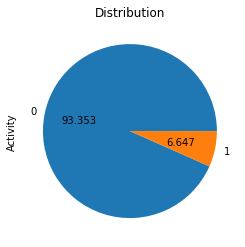

In [8]:
# divide dataframe into features, X and target y
X = df.drop(['Activity'],axis=1)
y = df['Activity']

# checking class distribution
print(y.value_counts())

# visualizing class distribution
ax = y.value_counts().plot(kind = 'pie', autopct = '%.3f')
ax.set_title("Distribution");

## DIVIDING INTO TRAIN AND TEST DATASET

The training and test data have the following dimensions:
(4284, 777)(1072, 777)
The class distribution of the train data:
0    4000
1     284
Name: Activity, dtype: int64


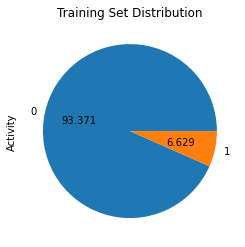

In [9]:
# dividing datasets into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking dimensions of train and test dataset
print("The training and test data have the following dimensions:\n{}{}".format(X_train.shape, X_test.shape))

# checking class distribution of train dataset
print("The class distribution of the train data:\n{}".format(y_train.value_counts()))

# visualizing class distribution of train dataset
ax = y_train.value_counts().plot(kind = 'pie', autopct = '%.3f')
ax.set_title("Training Set Distribution");

##  REMOVING LOW VARIANCE FEATURES
> The variance threshold function will remove columns that dont meet a certain threshold. This is done to improve model performance
>
> There are two different thresholds for this. Use the second one only when MinMaxScalar was used. You can use only one threshold

In [10]:
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))

# Fit
_ = vt.fit(X_train)

# Get the mask
mask = vt.get_support()

# Subset the DataFrame
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:, mask]

X_train.shape, X_test.shape

((4284, 352), (1072, 352))

In [11]:
# checking the distribution of the activity column of the test dataset

y_test.value_counts()

0    1000
1      72
Name: Activity, dtype: int64

> The number of rows in the dataset remain the same however the number of columns have reduced

## RANDOM FOREST MODEL TRAINING
> For this section, the model is trained on either unsampled data or resampled data.

## RESAMPLING USING SMOTE
> The dataset is resampled using SMOTE to obtain a active:inactive ratio of 1:1
>
> **THIS STEP SHOULD BE SKIPPED IF NO RESAMPLING WILL BE DONE**

### OVERSMAPLING WITH SMOTE

In [12]:
over = SMOTE(sampling_strategy=1)
X_train, y_train = over.fit_resample(X_train, y_train)

# checking class distribution on resampled dataset
print(y_train.value_counts())

0    4000
1    4000
Name: Activity, dtype: int64


The dataset is now balanced. 

## TRAINING MODELS

In [13]:
# creating model object
clf = RandomForestClassifier(n_jobs=-1)

# training model
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

## PREDICTIONS

In [14]:
# predicting on train dataset
train_predictions = clf.predict(X_train)    

# predicting on test dataset
test_predictions = clf.predict(X_test)

> If the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset.

## CHECKING METRICS
> The metrics will be checked for both the training data and the tes dataset
>
> For the confusion matrix: <br>
> True Negative (Top-Left Quadrant)<br>
False Positive (Top-Right Quadrant)<br>
False Negative (Bottom-Left Quadrant)<br>
True Positive (Bottom-Right Quadrant)<br>

### TRAINING DATA

Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
MCC:  1.0
AUROC:  1.0


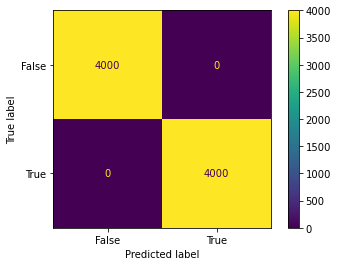

In [15]:
accuracy_test = accuracy_score(y_train, train_predictions)
precision = precision_score(y_train, train_predictions)
recall = recall_score(y_train, train_predictions)
f1 = f1_score(y_train, train_predictions)
mcc = matthews_corrcoef(y_train, train_predictions)

pred_prob = clf.predict_proba(X_train)[:,1]
auroc = roc_auc_score(y_train, pred_prob)                   

print("Accuracy Score: ", accuracy_test)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)
print("MCC: ", mcc)
print("AUROC: ", auroc)

cm = confusion_matrix(y_train, train_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

### TEST DATA

Accuracy Score:  0.9505597014925373
Precision Score:  0.7714285714285715
Recall Score:  0.375
F1 Score:  0.5046728971962617
MCC:  0.5169028326157308
AUROC:  0.9080069444444445


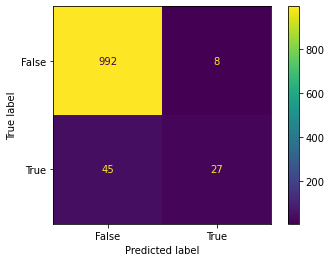

In [16]:
accuracy_test = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)

pred_prob = clf.predict_proba(X_test)
auroc = roc_auc_score(y_test, pred_prob[:,1])

print("Accuracy Score: ", accuracy_test)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)
print("MCC: ", mcc)
print("AUROC: ", auroc)

cm = confusion_matrix(y_test, test_predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

#### PLOTTING THE AUROC CURVE
> This is done for only the test data

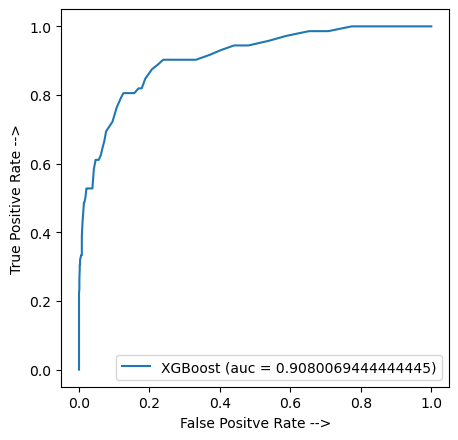

In [17]:
fpr, tpr, threshold = roc_curve(y_test, pred_prob[:, 1])
auc_score = auc(fpr, tpr)

plt.figure(figsize = (5, 5), dpi = 100)
plt.plot(fpr, tpr, label = 'XGBoost (auc = {})' .format(auc_score))
plt.xlabel('False Positve Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

> Is the curve consistent to the auroc value obtained previously

In [ ]:
# from sklearn.model_selection import cross_val_score
# from numpy import mean

# scores = cross_val_score(DECISION TREE, X, y, scoring = 'roc_auc', cv = 2)
# print('Mean ROC AUC: %.5f' % mean(scores))